<a href="https://colab.research.google.com/github/IlinValery/visual-gtsam/blob/master/visual_gtsam_initial_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pytextrank ipympl

In [2]:
# %matplotlib widget

In [3]:
!pip install --upgrade -q git+https://github.com/IlinValery/visual-gtsam

# Dataset demonstration

In [4]:
from visual_gtsam import Dataset, BarcodeDetector

In [5]:
dataset = Dataset() # used default file ID from Google Drive

Dataset is ready
Couldn't find key 'time' in source json file range_data.json


In [6]:
import matplotlib.pyplot as plt
import numpy as np

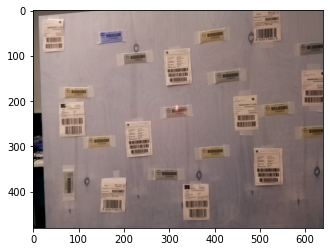

In [7]:
plt.imshow(dataset.get_next_image().get_origin_rgb())

In [8]:
dataset.get_next_image()

Time: 2020-10-15T16:30:30.725162: path: downloads/images/1602779430_0725162029.png

In [9]:
dataset.get_next_pair()

(Time: 2020-10-15T16:30:30.917924: path: downloads/images/1602779430_0917923927.png,
 Time: 2020-10-15T16:30:30.912530: acceleration: X = -1.122137427330017	Y = -1.3282443284988403	 Z = 0.8778625726699829; velocity: X = 1.0846120119094849	Y = -0.7661718726158142	 Z = 7.57552433013916)

In [10]:
print(dataset.get_statistic())

Total amount of IMU values is 12927
Total amount of Images is 624
Total amount of UR values 11224
Total amount of range values 3142



In [11]:
vel_dataset, acc_dataset = dataset.get_imu_statistic()

In [12]:
acc_dataset.shape

(12927, 3)

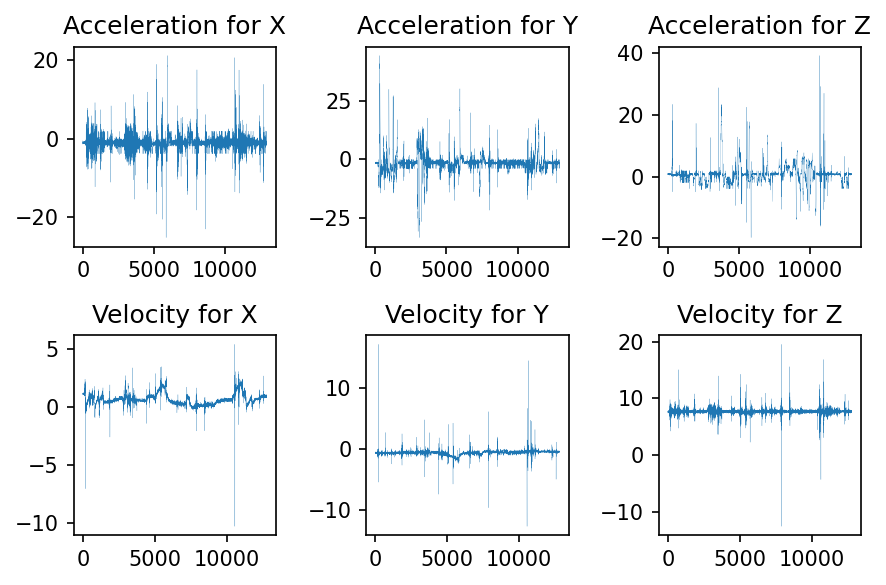

In [13]:
linewidth = 0.1
fig, axs = plt.subplots(2, 3, dpi=150)

axs[0, 0].plot(acc_dataset[:,0], linewidth=linewidth)
axs[0, 0].set_title('Acceleration for X')
axs[0, 1].plot(acc_dataset[:,1], linewidth=linewidth)
axs[0, 1].set_title('Acceleration for Y')
axs[0, 2].plot(acc_dataset[:,2], linewidth=linewidth)
axs[0, 2].set_title('Acceleration for Z')
axs[1, 0].plot(vel_dataset[:,0], linewidth=linewidth)
axs[1, 0].set_title('Velocity for X')
axs[1, 1].plot(vel_dataset[:,1], linewidth=linewidth)
axs[1, 1].set_title('Velocity for Y')
axs[1, 2].plot(vel_dataset[:,2], linewidth=linewidth)
axs[1, 2].set_title('Velocity for Z')
fig.tight_layout()


# BarcodeDetector demonstration

In [14]:
detector = BarcodeDetector()

Weights are ready
Launching from CUDA


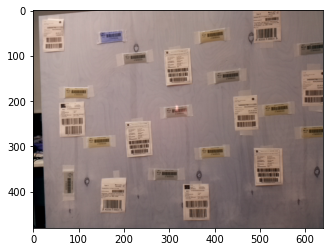

In [15]:
image = dataset.get_next_image().get_origin_rgb()
plt.imshow(image)

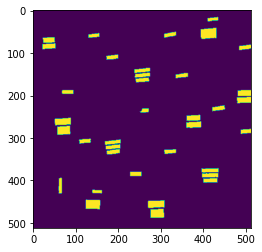

In [16]:
mask = detector.get_mask(image, thresh=0.95)
plt.imshow(mask)

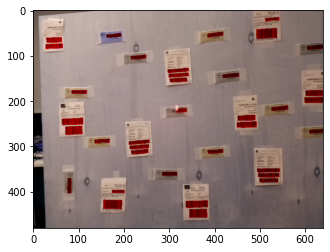

In [17]:
image_with_mask = detector.visualize_mask(image, mask, apply_resize=True)
plt.imshow(image_with_mask)

In [18]:
mask = detector.resize_mask_to_origin(image, mask) # !!! resizing
contours = detector.get_contours(mask, apply_postprocessing=False)
centers = detector.get_contours_centers(contours)
centers


[[365.0, 447.5],
 [362.0, 427.5],
 [176.0, 428.0],
 [188.0, 400.0],
 [520.5, 375.5],
 [80.0, 387.0],
 [301.5, 361.0],
 [520.0, 358.0],
 [504.0, 359.5],
 [402.5, 311.5],
 [234.5, 301.5],
 [237.0, 306.5],
 [247.5, 305.5],
 [152.5, 289.0],
 [624.5, 267.0],
 [91.0, 265.0],
 [471.5, 252.0],
 [87.5, 246.0],
 [471.5, 237.5],
 [327.0, 221.0],
 [545.0, 217.0],
 [619.0, 198.5],
 [620.5, 183.0],
 [101.5, 180.5],
 [437.0, 144.0],
 [321.0, 148.5],
 [314.5, 149.5],
 [320.5, 133.0],
 [232.5, 103.5],
 [622.0, 82.0],
 [47.0, 80.0],
 [47.0, 66.5],
 [179.0, 55.5],
 [402.5, 54.0],
 [515.5, 51.5],
 [528.0, 20.5]]

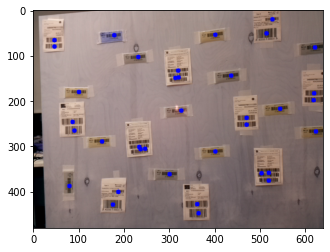

In [19]:
image_with_centers = detector.draw_centers_on_image(centers, image)
plt.imshow(image_with_centers)

## UR Trajectory

In [20]:
true_trajectory = dataset.get_ur_sequence().get_true_trajectory()

In [29]:
true_trajectory = true_trajectory - true_trajectory[0]

In [30]:
true_trajectory[:,0]

array([ 0.        ,  0.        ,  0.        , ..., -0.06103181,
       -0.06103181, -0.06103122])

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

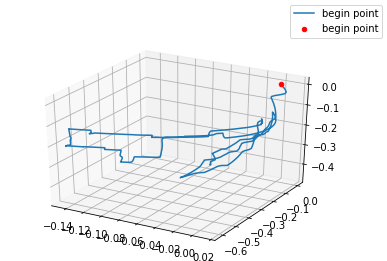

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(true_trajectory[:,0], true_trajectory[:,1], true_trajectory[:,2], label='begin point')
ax.scatter(true_trajectory[0,0], true_trajectory[0,1], true_trajectory[0,2], c='r', label='begin point')

fig.legend()
fig.show

In [32]:
import plotly.express as px
import plotly.graph_objects as go

x=true_trajectory[:,0]
y=true_trajectory[:,1]
z=true_trajectory[:,2]

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y, z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig.show()